## <center style='color:purple'>HouseVal: House Price Prediction Project using Machine Learning</center>

Dataset is downloaded from: https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv

<h2 style="color:blue">Importing necessary libraries</h2>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style="color:blue">Loading data into dataframe</h2>

In [6]:
df1 = pd.read_csv("property_listing_data_in_Bangladesh.csv")
df1.head()

,title,beds,bath,area,address,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,13-Aug-22,50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,25-Jan-22,30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,22-Feb-23,30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,28-Oct-21,35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,19-Feb-23,25 Thousand


In [7]:
df1.shape

(7557, 11)

<h2 style="color:blue">Individual Bar Chart for the categorical features</h2>

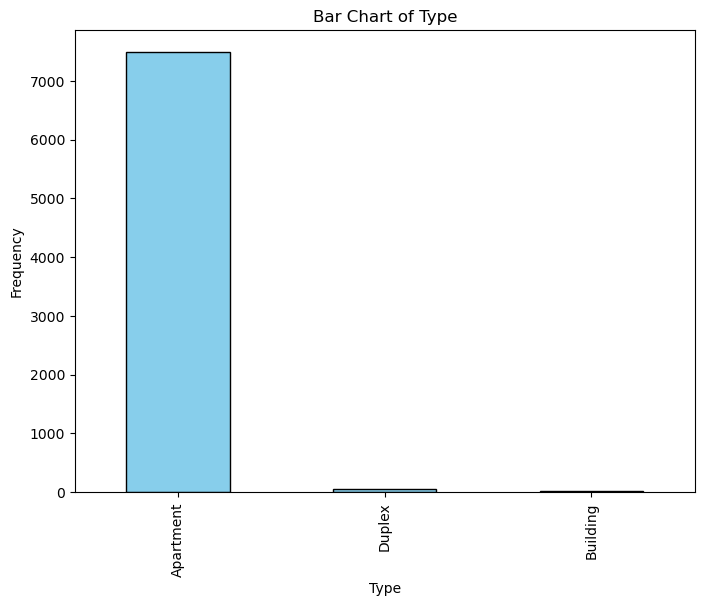

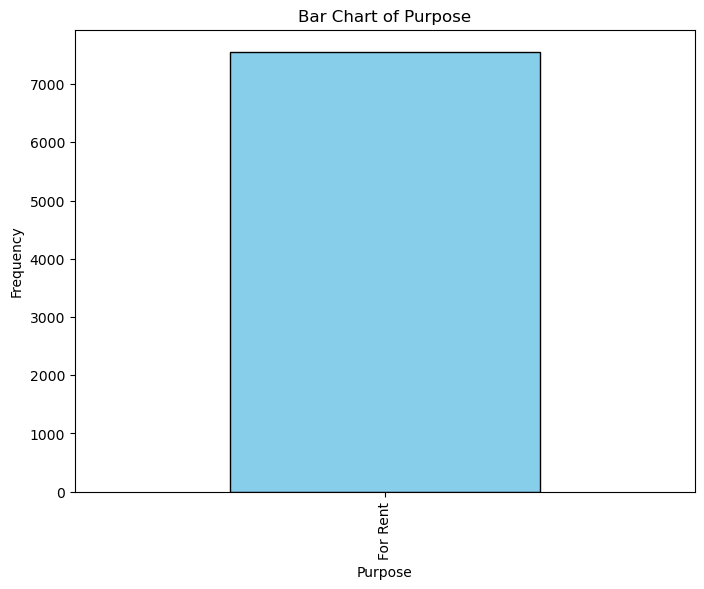

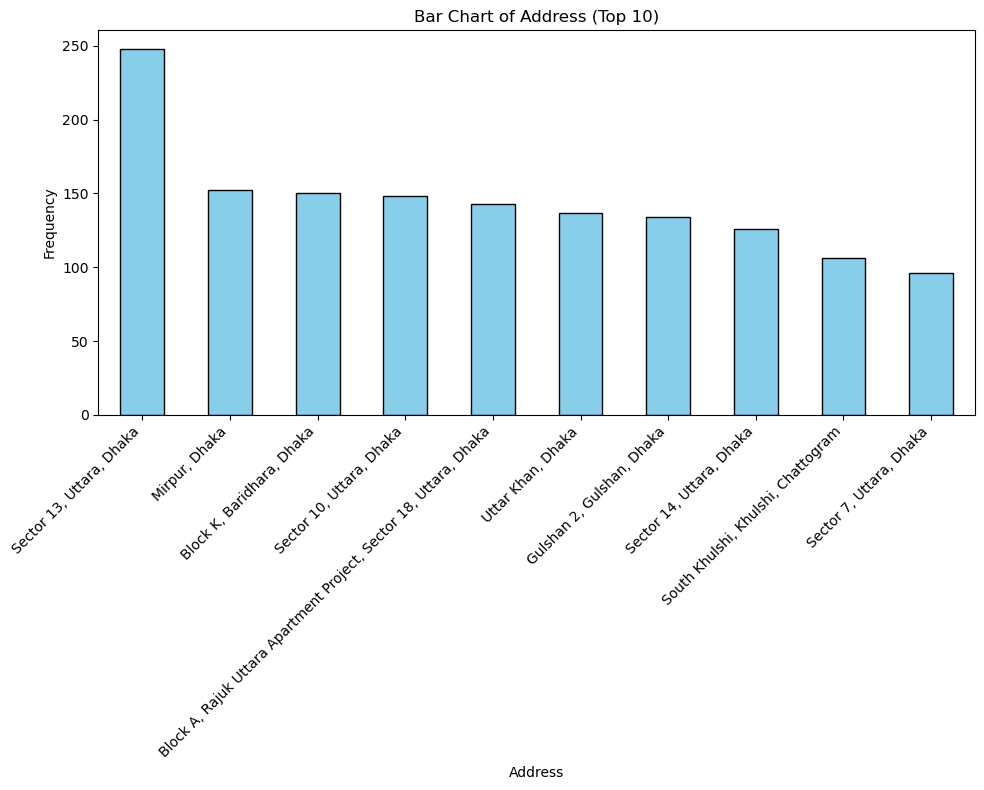

In [9]:
# List of categorical features to plot
categorical_features = ['type', 'purpose', 'address']

# Plot 'type' bar chart
plt.figure(figsize=(8, 6))
df1['type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

# Plot 'purpose' bar chart
plt.figure(figsize=(8, 6))
df1['purpose'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()

# Plot 'address' bar chart (top 10 addresses for better visualization)
plt.figure(figsize=(10, 8))
df1['address'].value_counts().nlargest(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of Address (Top 10)')
plt.xlabel('Address')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Plot bar charts
# plt.figure(figsize=(15, 10))

# for i, feature in enumerate(categorical_features, 1):
#     plt.subplot(2, 2, i)  # Adjust layout for 3 features
#     df1[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
#     plt.title(f'Bar Chart of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

**For the address feature, only the top 10 most frequent addresses are shown to avoid overcrowding. 
The other features, like title, flooPlan, url, and lastUpdated, have unique or nearly unique values, so bar charts wouldn’t be useful for them.**

<h2 style="color:blue">Bar plot for Categorical vs categorical</h2>

<Figure size 800x600 with 0 Axes>

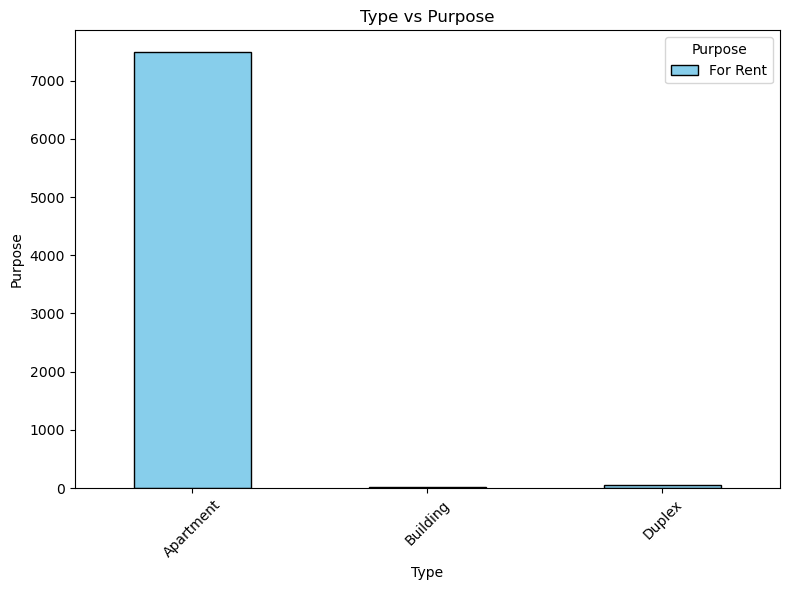

<Figure size 1000x800 with 0 Axes>

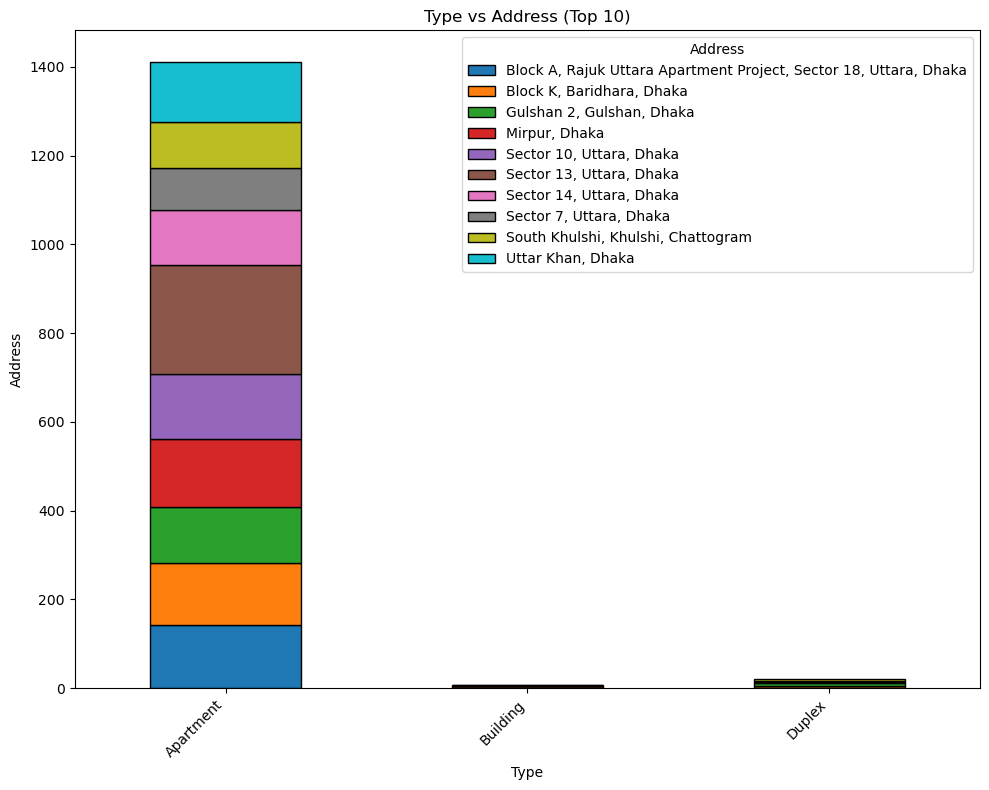

<Figure size 1000x800 with 0 Axes>

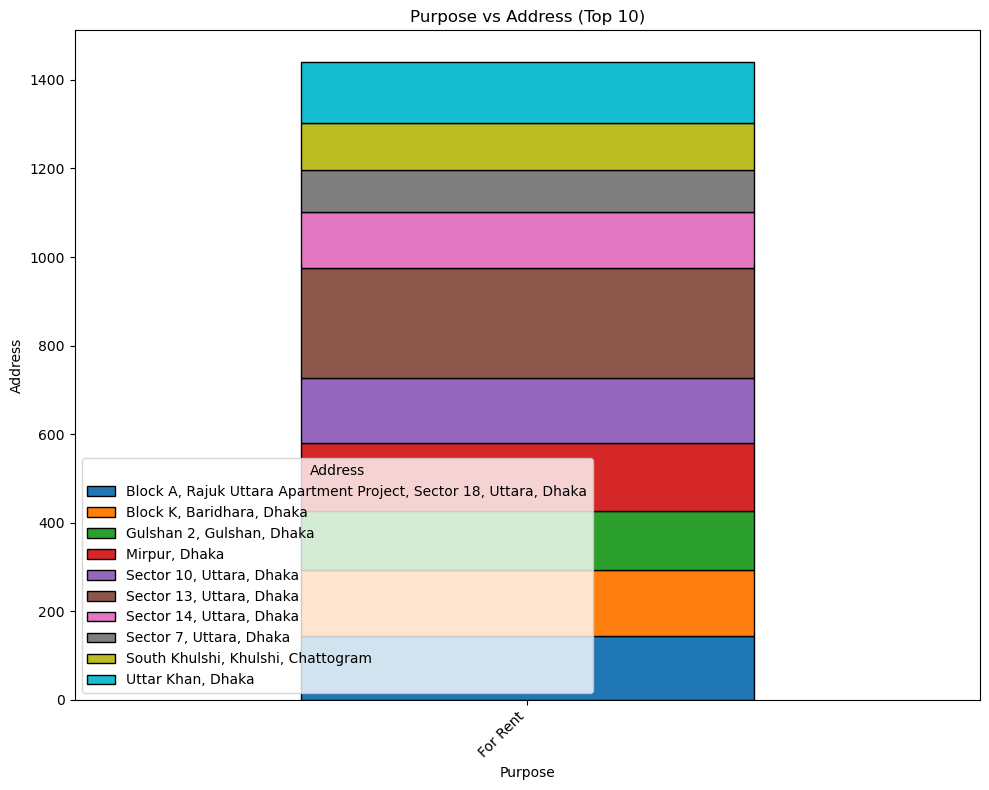

In [12]:
# Plot 'type' vs 'purpose'
plt.figure(figsize=(8, 6))
type_purpose_counts = df1.groupby(['type', 'purpose']).size().unstack()
type_purpose_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black', figsize=(8, 6))
plt.title('Type vs Purpose')
plt.xlabel('Type')
plt.ylabel('Purpose')
plt.legend(title='Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 'type' vs 'address' (Top 10 addresses)
plt.figure(figsize=(10, 8))
type_address_counts = df1[df1['address'].isin(df1['address'].value_counts().nlargest(10).index)]
type_address_counts = type_address_counts.groupby(['type', 'address']).size().unstack()
type_address_counts.plot(kind='bar', stacked=True, edgecolor='black', figsize=(10, 8))
plt.title('Type vs Address (Top 10)')
plt.xlabel('Type')
plt.ylabel('Address')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Address')
plt.tight_layout()
plt.show()

# Plot 'purpose' vs 'address' (Top 10 addresses)
plt.figure(figsize=(10, 8))
purpose_address_counts = df1[df1['address'].isin(df1['address'].value_counts().nlargest(10).index)]
purpose_address_counts = purpose_address_counts.groupby(['purpose', 'address']).size().unstack()
purpose_address_counts.plot(kind='bar', stacked=True, edgecolor='black', figsize=(10, 8))
plt.title('Purpose vs Address (Top 10)')
plt.xlabel('Purpose')
plt.ylabel('Address')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Address')
plt.tight_layout()
plt.show()

<h2 style="color:blue">Data Cleaning: Handle Missing Values</h2>

In [14]:
df1.isnull().sum()

title          0
beds           2
bath           3
area           2
address        4
type           0
purpose        0
flooPlan       1
url            0
lastUpdated    0
price          0
dtype: int64

In [15]:
df1.shape

(7557, 11)

In [16]:
df2 = df1.dropna()
df2.isnull().sum()

title          0
beds           0
bath           0
area           0
address        0
type           0
purpose        0
flooPlan       0
url            0
lastUpdated    0
price          0
dtype: int64

In [17]:
df2.shape

(7545, 11)

<h2 style="color:blue">Feature Engineering</h2>

In [19]:
df2['beds'].unique()

array(['3', '5', '4', '1 Bed', '2', '17', '6', '21', '7', '20', '32',
       '22', '36'], dtype=object)

In [20]:
df2['bath'].unique()

array(['4', '3', '5', '2', '1 Bath', '6', '10', '8', '7'], dtype=object)

<h2 style="color:blue">Standardization</h2>

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
df2['beds_standardized'] = df2['beds'].apply(lambda x: int(x.split(' ')[0]))
df2.beds_standardized.unique()

array([ 3,  5,  4,  1,  2, 17,  6, 21,  7, 20, 32, 22, 36], dtype=int64)

In [24]:
df2['bath_standardized'] = df2['bath'].apply(lambda x: int(x.split(' ')[0]))
df2.bath_standardized.unique()

array([ 4,  3,  5,  2,  1,  6, 10,  8,  7], dtype=int64)

<h2 style='color:blue'>Dropping 'beds' and 'bath' features to avoid string values</h2>

In [26]:
df2 = df2.drop(['beds', 'bath'], axis=1)
df2.head()
# pd.set_option('display.max_rows', None); df3

,title,area,address,type,purpose,flooPlan,url,lastUpdated,price,beds_standardized,bath_standardized
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,13-Aug-22,50 Thousand,3,4
1,"Apartment Ready To Rent In South Khulshi, Near...","1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,25-Jan-22,30 Thousand,3,4
2,"Smartly priced 1950 SQ FT apartment, that you ...","1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,22-Feb-23,30 Thousand,3,4
3,2000 Sq Ft Residential Apartment Is Up For Ren...,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,28-Oct-21,35 Thousand,3,3
4,Strongly Structured This 1650 Sq. ft Apartment...,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,19-Feb-23,25 Thousand,3,4


<h2 style="color:blue">Convert Area Column to Numeric Values</h2>

In [28]:
df2['area'].unique()

array(['2,200 sqft', '1,400 sqft', '1,950 sqft', '2,000 sqft',
       '1,650 sqft', '3,400 sqft', '1,600 sqft', '1,250 sqft',
       '2,150 sqft', '1,580 sqft', '3,200 sqft', '3,000 sqft',
       '1,800 sqft', '1,750 sqft', '1,310 sqft', '1,700 sqft',
       '2,750 sqft', '2,500 sqft', '550 sqft', '1,050 sqft', '1,350 sqft',
       '3,590 sqft', '400 sqft', '2,400 sqft', '500 sqft', '2,300 sqft',
       '4,350 sqft', '1,200 sqft', '800 sqft', '2,146 sqft', '1,315 sqft',
       '1,500 sqft', '700 sqft', '600 sqft', '960 sqft', '4,200 sqft',
       '2,250 sqft', '1,517 sqft', '6,300 sqft', '1,407 sqft',
       '1,850 sqft', '1,150 sqft', '900 sqft', '1,975 sqft', '1,300 sqft',
       '1,450 sqft', '950 sqft', '1,100 sqft', '2,600 sqft', '750 sqft',
       '2,115 sqft', '3,600 sqft', '3,150 sqft', '2,100 sqft',
       '1,319 sqft', '1,676 sqft', '1,825 sqft', '2,977 sqft', '350 sqft',
       '450 sqft', '1,190 sqft', '2,230 sqft', '2,280 sqft', '2,197 sqft',
       '1,393 sqft', '1,550 sq

In [29]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [30]:
df2[~df2['area'].apply(is_float)].head(10)
# pd.set_option('display.max_rows', None); df3[~df3['area'].apply(is_float)]

,title,area,address,type,purpose,flooPlan,url,lastUpdated,price,beds_standardized,bath_standardized
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,13-Aug-22,50 Thousand,3,4
1,"Apartment Ready To Rent In South Khulshi, Near...","1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,25-Jan-22,30 Thousand,3,4
2,"Smartly priced 1950 SQ FT apartment, that you ...","1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,22-Feb-23,30 Thousand,3,4
3,2000 Sq Ft Residential Apartment Is Up For Ren...,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,28-Oct-21,35 Thousand,3,3
4,Strongly Structured This 1650 Sq. ft Apartment...,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,19-Feb-23,25 Thousand,3,4
5,"A nice residential flat of 3400 SQ FT, for ren...","3,400 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,14-Feb-23,1.1 Lakh,5,5
6,1600 Square Feet Apartment With Amazing Rooms ...,"1,600 sqft","Sector 6, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,06-Aug-22,35 Thousand,3,3
7,Let Us Help You To Rent This 1250 Sq Ft Apartm...,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,04-Jan-23,23 Thousand,3,3
8,An Extensive Apartment Of 2150 Sq Ft Is Vacant...,"2,150 sqft","Sector 10, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,28-Jun-22,40 Thousand,3,4
9,A well-constructed 1250 SQ FT apartment is rea...,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,04-Jan-23,23 Thousand,3,3


In [31]:
def convert_sqft_to_num(x):
    # Remove commas and non-numeric characters except for hyphens
    x = ''.join(c for c in x if c.isdigit() or c == '-')
    
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

<h2 style="color:blue">Convert Price Column to Numeric Values</h2>

In [33]:
df2['price'].unique()

array(['50 Thousand', '30 Thousand', '35 Thousand', '25 Thousand',
       '1.1 Lakh', '23 Thousand', '40 Thousand', '20 Thousand',
       '2.5 Lakh', '1.2 Lakh', '21 Thousand', '60 Thousand',
       '28 Thousand', '75 Thousand', '55 Thousand', '12 Thousand',
       '2 Lakh', '10 Thousand', '18 Thousand', '1.5 Lakh', '85 Thousand',
       '70 Thousand', '43 Thousand', '1 Lakh', '80 Thousand',
       '45 Thousand', '26 Thousand', '16 Thousand', '14.5 Thousand',
       '14 Thousand', '15 Thousand', '90 Thousand', '4 Lakh', '3.5 Lakh',
       '27 Thousand', '22 Thousand', '15.5 Thousand', '95 Thousand',
       '42 Thousand', '13 Thousand', '11.5 Thousand', '7.3 Thousand',
       '1.7 Lakh', '36 Thousand', '32 Thousand', '17 Thousand',
       '13.5 Thousand', '34 Thousand', '1.8 Lakh', '65 Thousand',
       '1.65 Lakh', '19 Thousand', '18.6 Thousand', '1.3 Lakh',
       '4.2 Lakh', '47 Thousand', '72 Thousand', '1.6 Lakh', '2.8 Lakh',
       '1.4 Lakh', '9 Thousand', '1.25 Lakh', '3 Lakh', 

In [34]:
def convert_price_to_float(price):
    # Remove commas and split by spaces
    tokens = price.replace(',', '').split()
    
    # Convert based on unit
    if 'Thousand' in tokens:
        return float(tokens[0]) * 1000
    elif 'Lakh' in tokens:
        return float(tokens[0]) * 100000
    else:
        return None

In [35]:
df3 = df2.copy()
df3.area = df3.area.apply(convert_sqft_to_num)
df3 = df3[df3.area.notnull()]

df3.price = df3.price.apply(convert_price_to_float)
df3 = df3[df3.price.notnull()]
df3.head()

,title,area,address,type,purpose,flooPlan,url,lastUpdated,price,beds_standardized,bath_standardized
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,2200.0,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,13-Aug-22,50000.0,3,4
1,"Apartment Ready To Rent In South Khulshi, Near...",1400.0,"South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,25-Jan-22,30000.0,3,4
2,"Smartly priced 1950 SQ FT apartment, that you ...",1950.0,"Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,22-Feb-23,30000.0,3,4
3,2000 Sq Ft Residential Apartment Is Up For Ren...,2000.0,"Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,28-Oct-21,35000.0,3,3
4,Strongly Structured This 1650 Sq. ft Apartment...,1650.0,"Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,19-Feb-23,25000.0,3,4


<h2 style="color:blue">Add new feature called price per square feet</h2>

In [37]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/df4['area']
df4.head()

,title,area,address,type,purpose,flooPlan,url,lastUpdated,price,beds_standardized,bath_standardized,price_per_sqft
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,2200.0,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,13-Aug-22,50000.0,3,4,22.727273
1,"Apartment Ready To Rent In South Khulshi, Near...",1400.0,"South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,25-Jan-22,30000.0,3,4,21.428571
2,"Smartly priced 1950 SQ FT apartment, that you ...",1950.0,"Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,22-Feb-23,30000.0,3,4,15.384615
3,2000 Sq Ft Residential Apartment Is Up For Ren...,2000.0,"Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,28-Oct-21,35000.0,3,3,17.500000
4,Strongly Structured This 1650 Sq. ft Apartment...,1650.0,"Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,19-Feb-23,25000.0,3,4,15.151515


<h2 style="color:blue">Individual Histogram for the numerical features</h2>

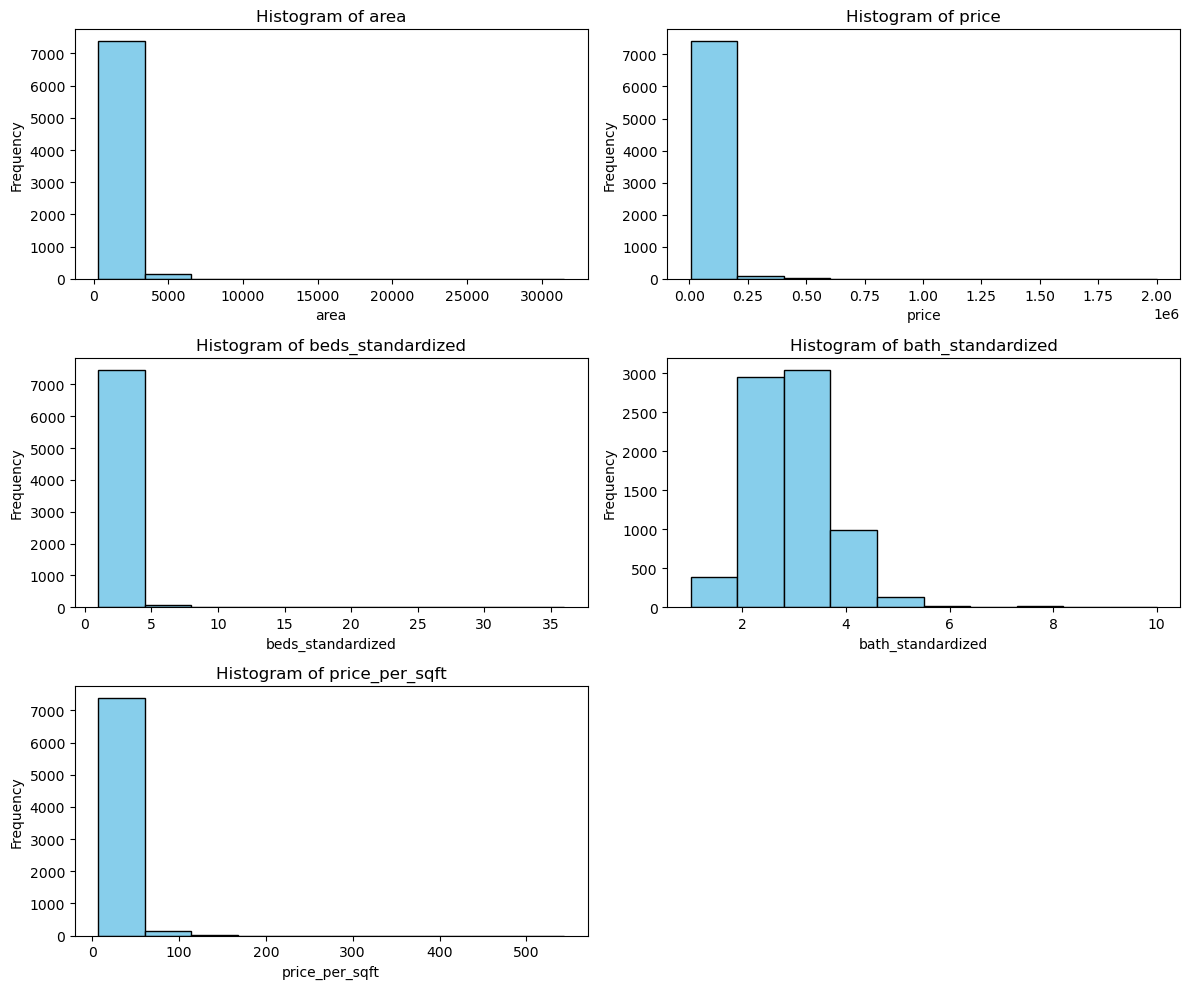

In [39]:
# List of numerical features to plot
numerical_features = ['area', 'price', 'beds_standardized', 'bath_standardized', 'price_per_sqft']

# Plot histograms
plt.figure(figsize=(12, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)  # Adjust layout for 5 features
    plt.hist(df4[feature], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
df4.head()

,title,area,address,type,purpose,flooPlan,url,lastUpdated,price,beds_standardized,bath_standardized,price_per_sqft
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,2200.0,"Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,13-Aug-22,50000.0,3,4,22.727273
1,"Apartment Ready To Rent In South Khulshi, Near...",1400.0,"South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,25-Jan-22,30000.0,3,4,21.428571
2,"Smartly priced 1950 SQ FT apartment, that you ...",1950.0,"Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,22-Feb-23,30000.0,3,4,15.384615
3,2000 Sq Ft Residential Apartment Is Up For Ren...,2000.0,"Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,28-Oct-21,35000.0,3,3,17.500000
4,Strongly Structured This 1650 Sq. ft Apartment...,1650.0,"Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,19-Feb-23,25000.0,3,4,15.151515


<h2 style="color:blue">Categorical vs Numerical ( with different colors )</h2>

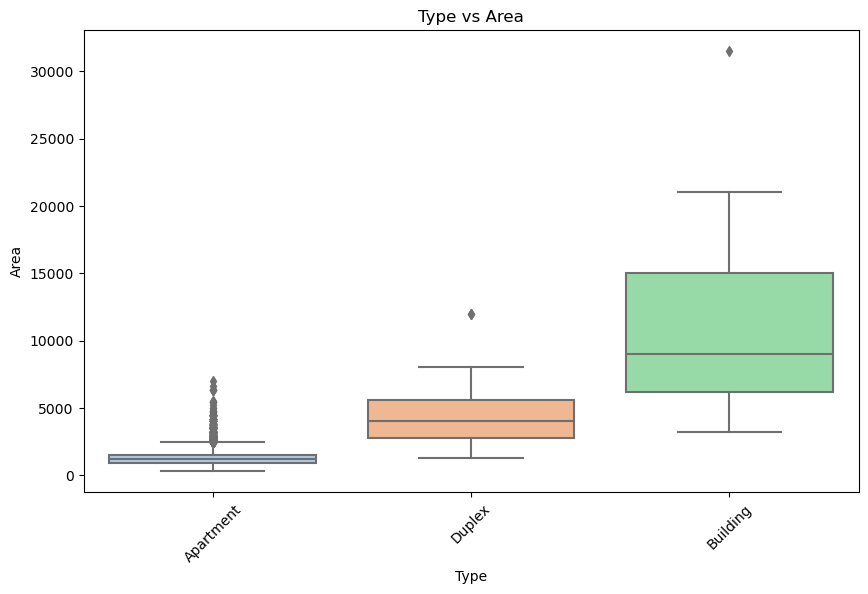

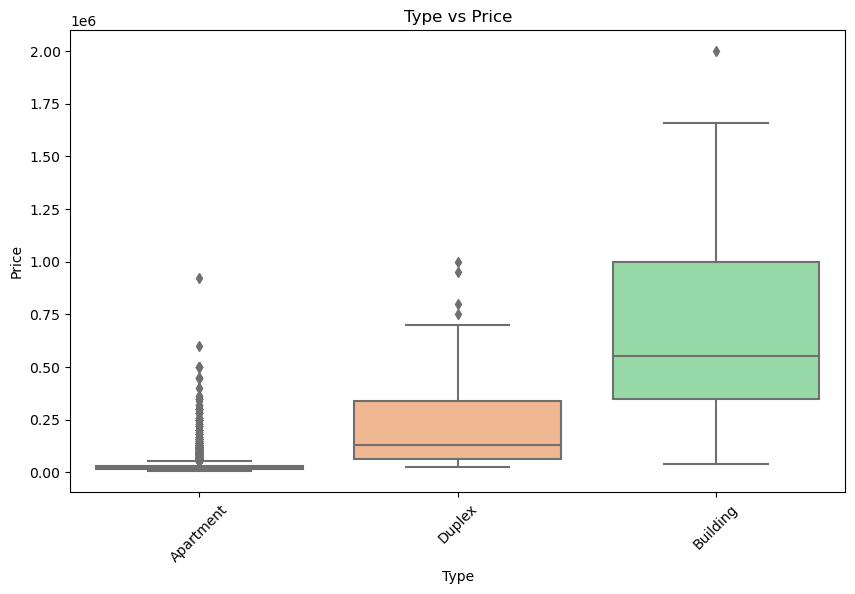

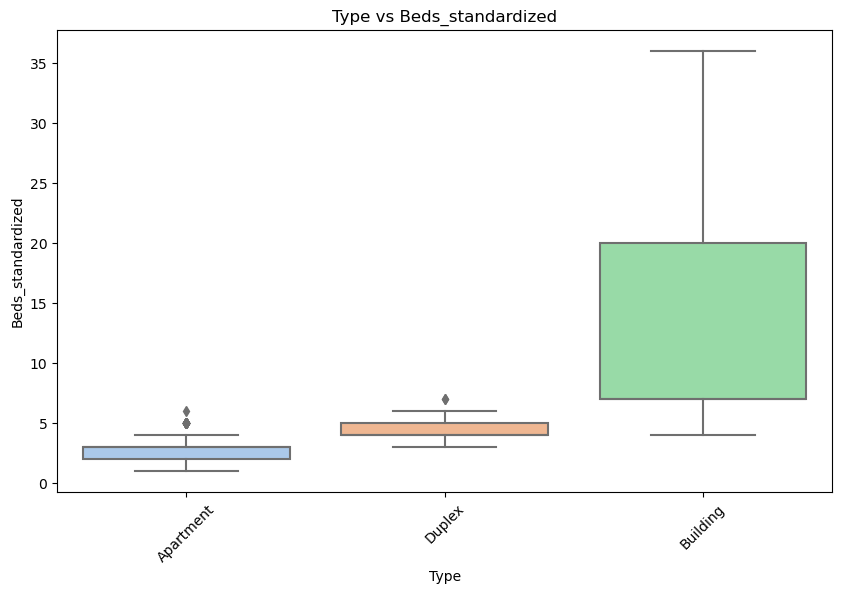

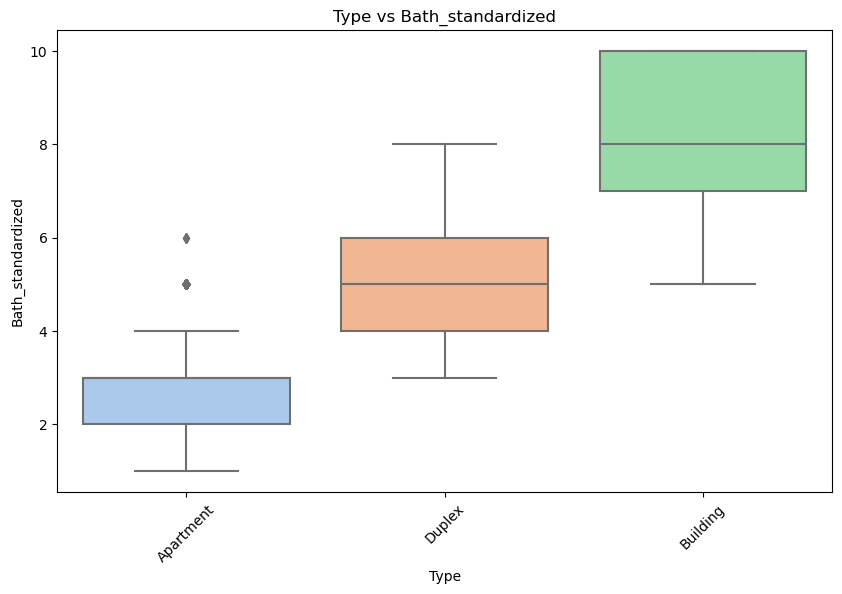

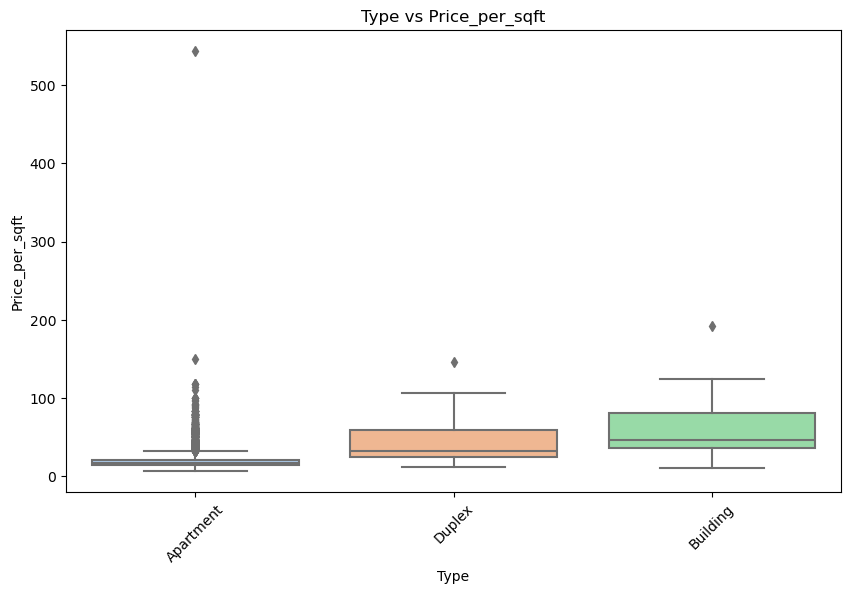

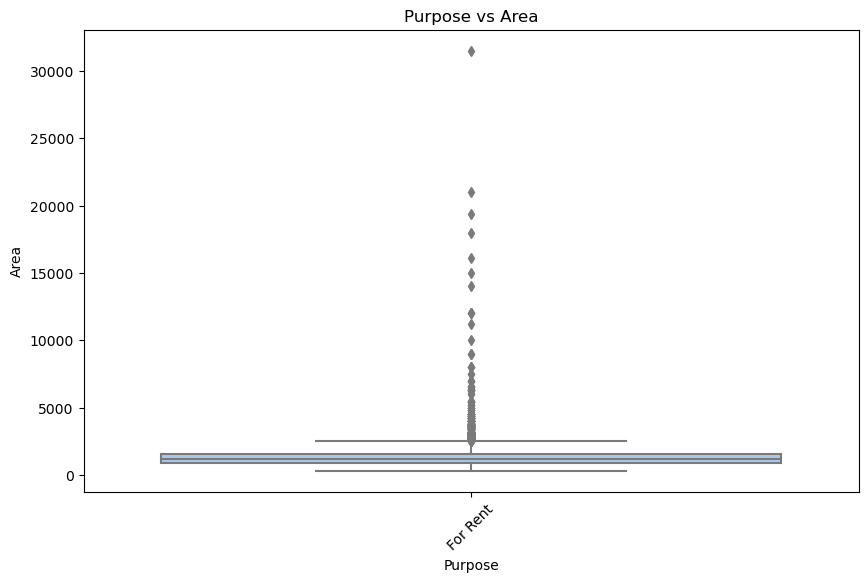

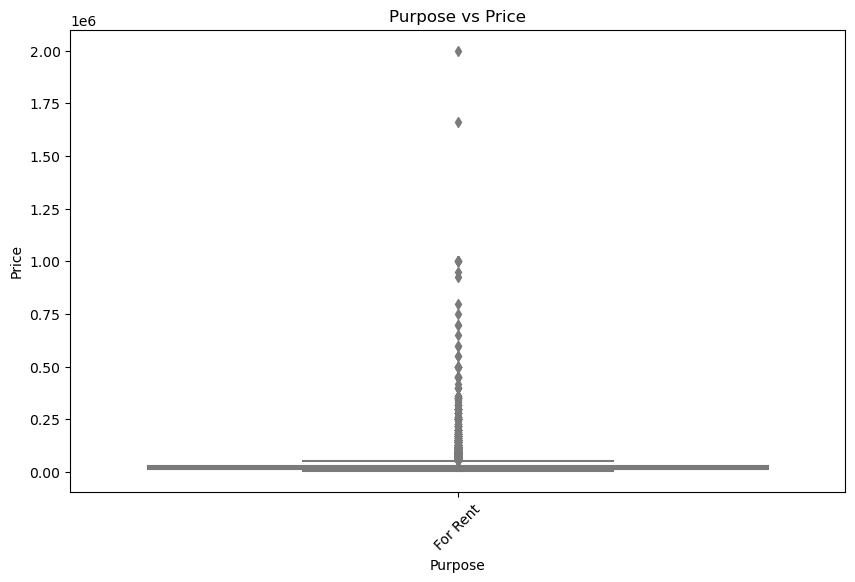

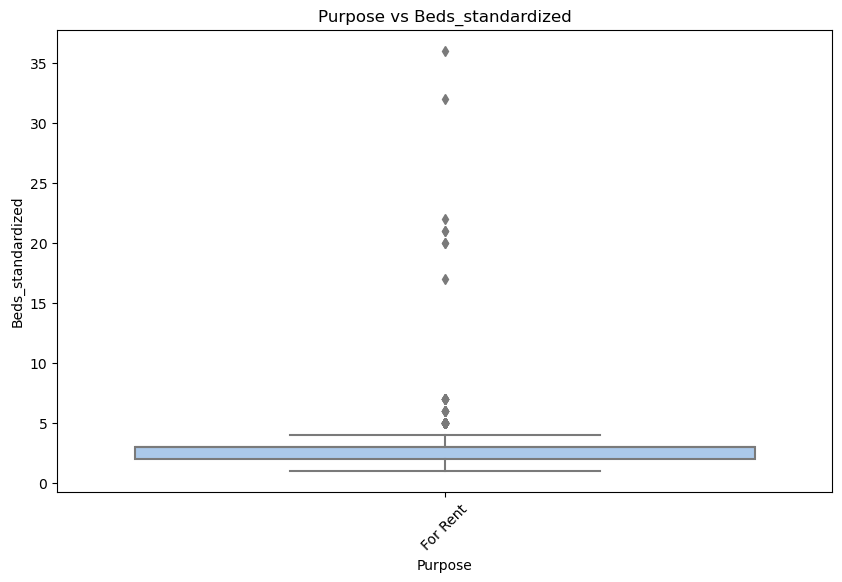

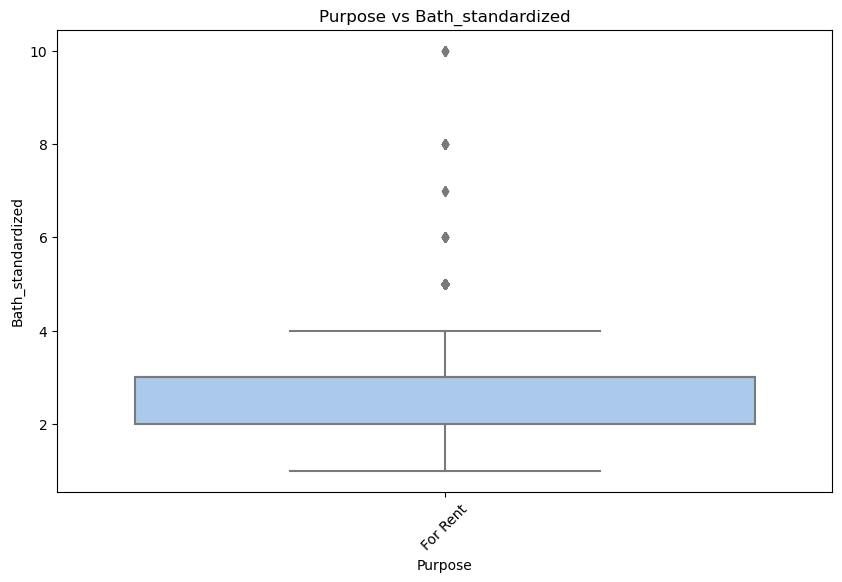

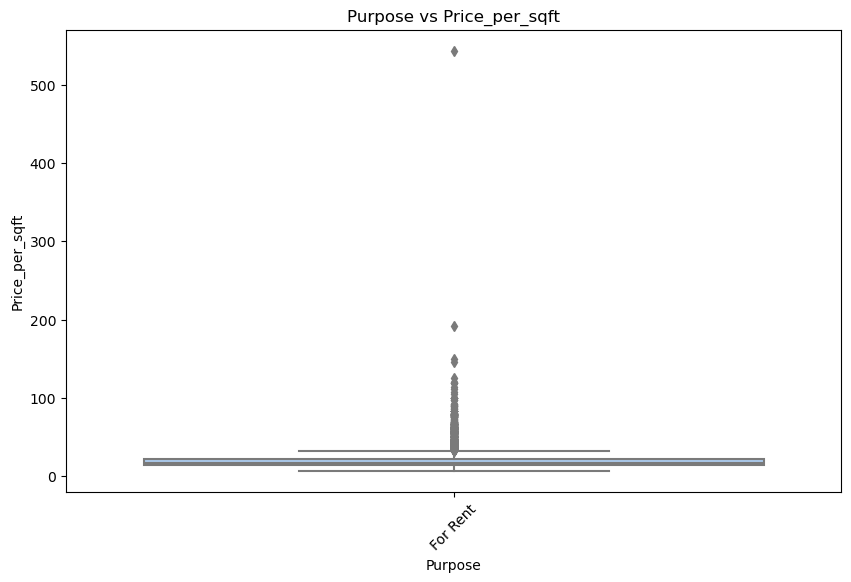

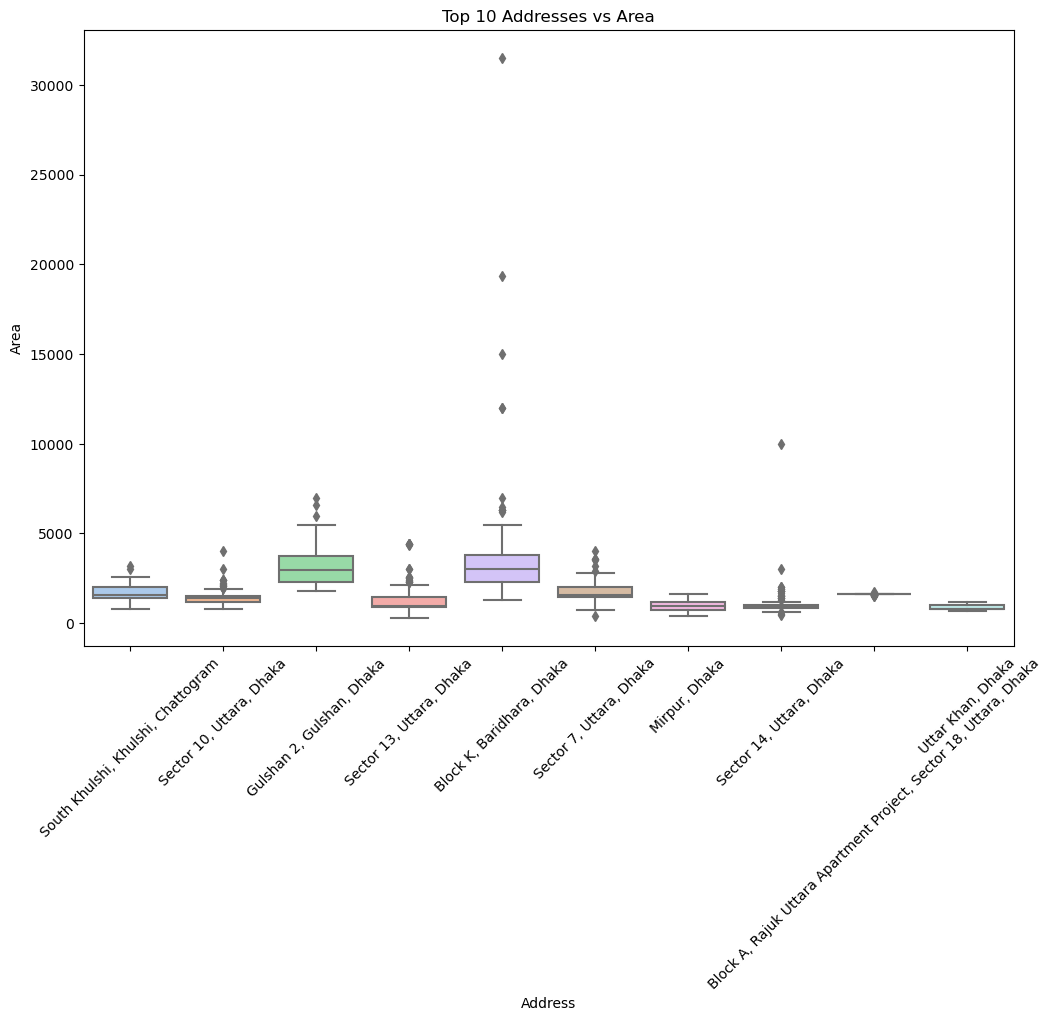

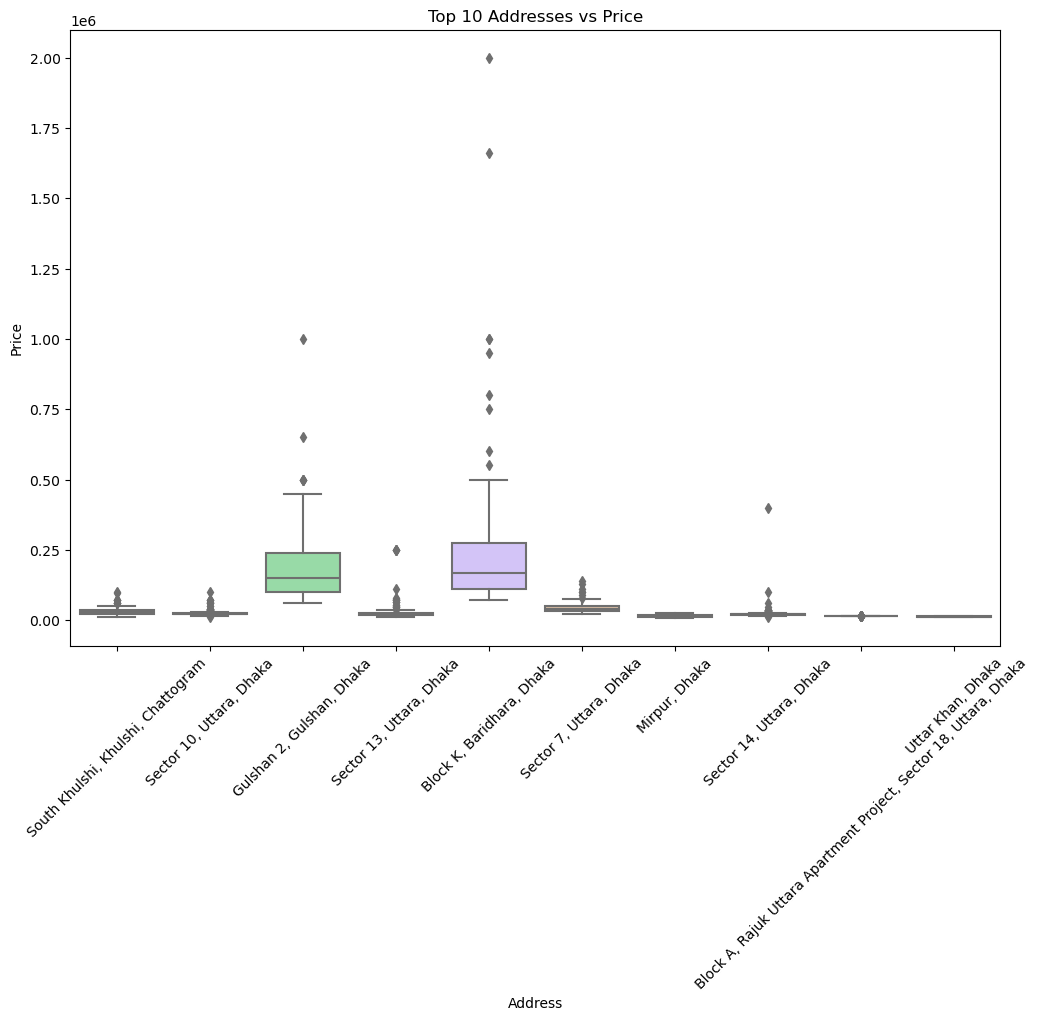

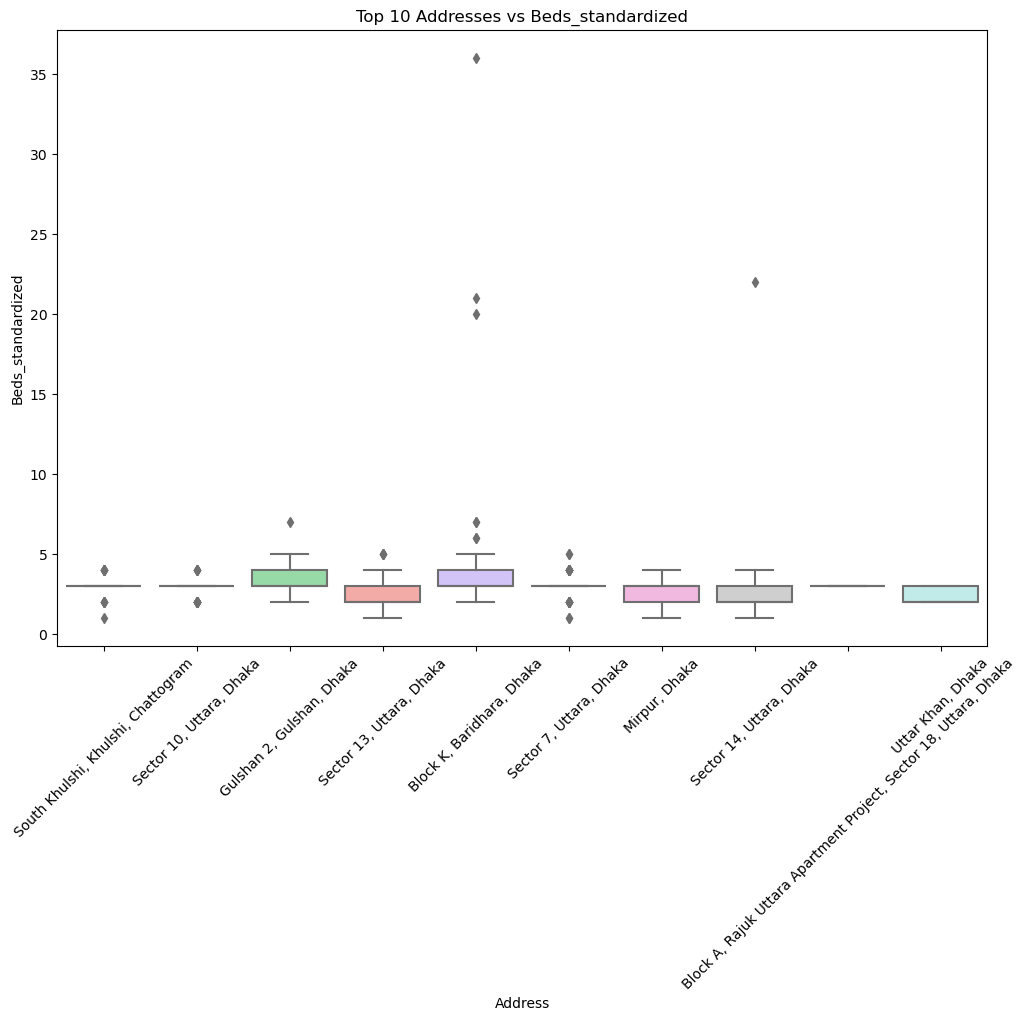

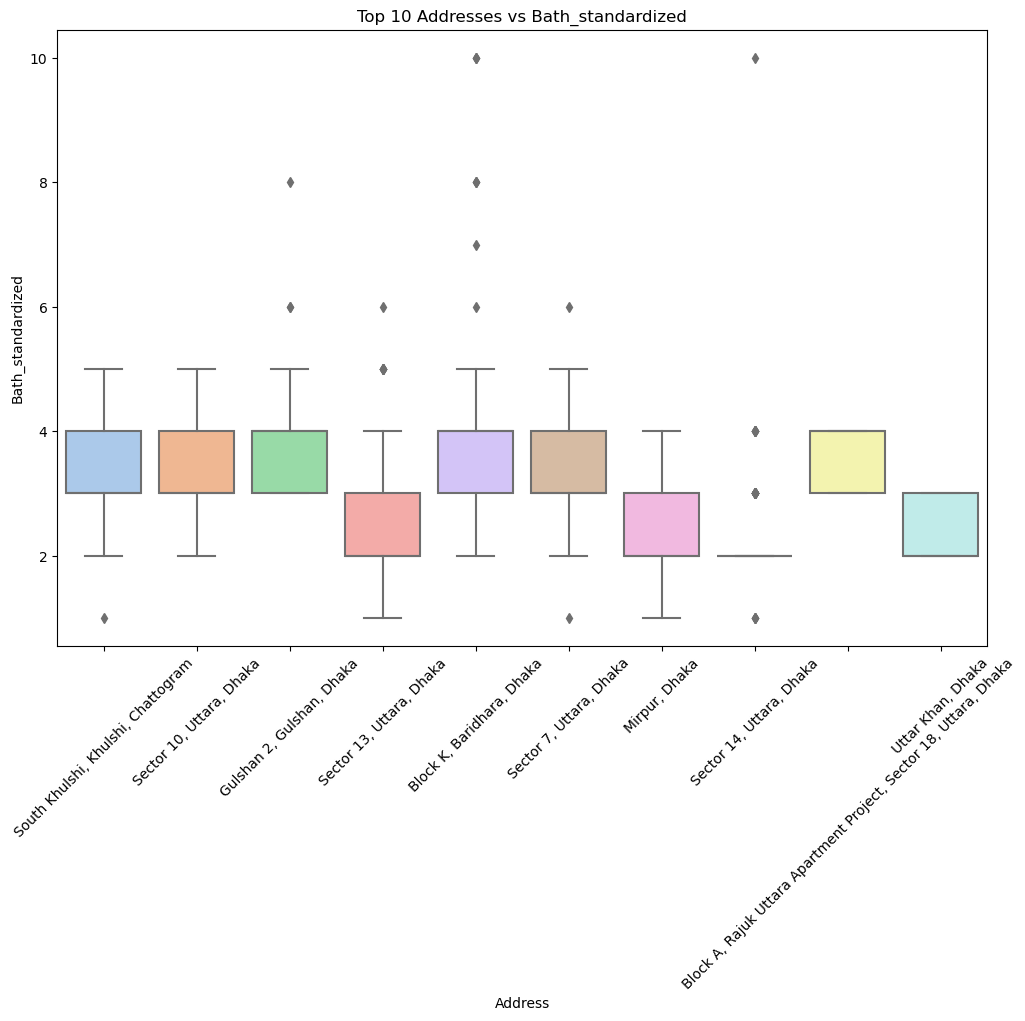

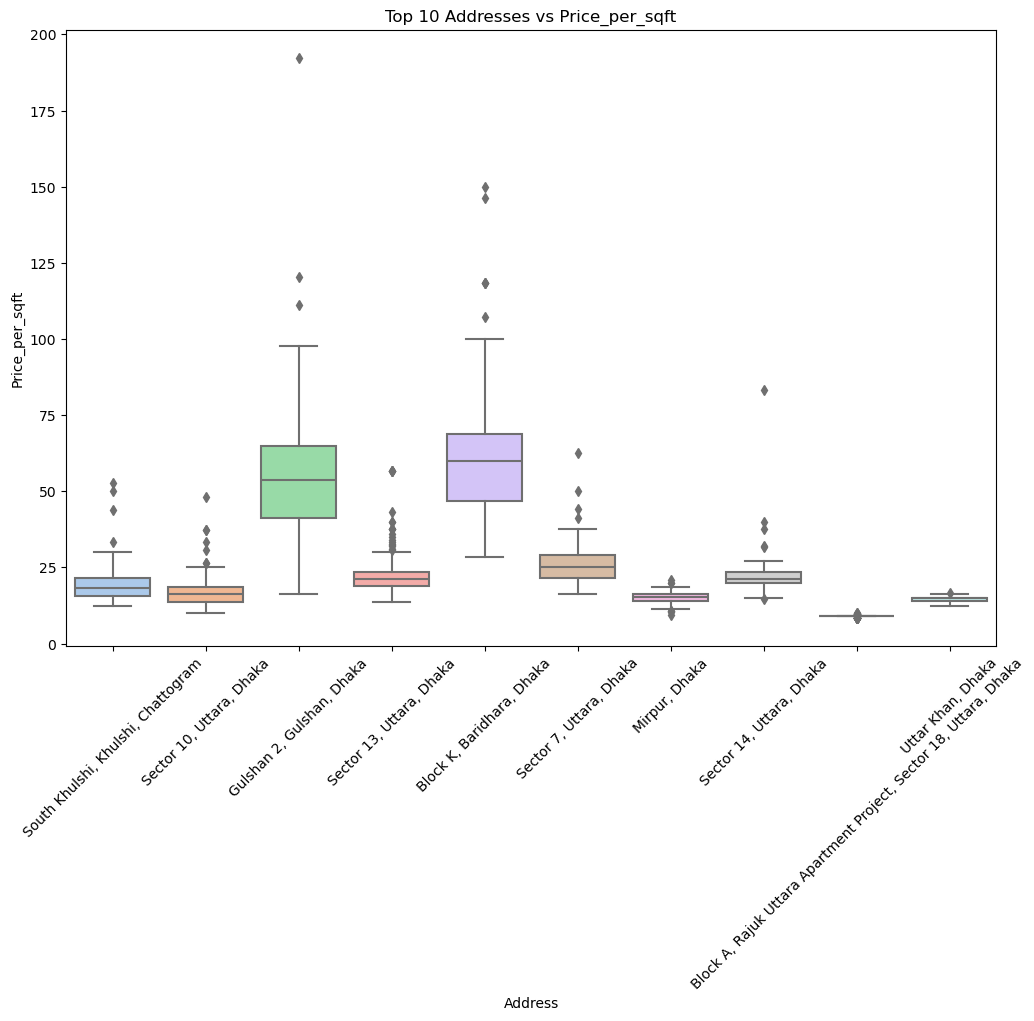

In [42]:
# Selecting a subset for high-cardinality categorical features
top_n_addresses = df4['address'].value_counts().index[:10] # Show only top 10 addresses
# Filtering the dataset to include only the top 10 addresses
df4_filtered = df4[df4['address'].isin(top_n_addresses)]
# Plot each categorical feature against each numerical feature
categorical_features = ['type', 'purpose'] # Exclude 'address' for main plots due to high cardinality
numerical_features = ['area', 'price', 'beds_standardized', 'bath_standardized', 'price_per_sqft']
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df4, x=cat_feature, y=num_feature, palette='pastel')
        plt.title(f"{cat_feature.capitalize()} vs {num_feature.capitalize()}")
        plt.xlabel(cat_feature.capitalize())
        plt.ylabel(num_feature.capitalize())
        plt.xticks(rotation=45)
        plt.show()
# Special plot for address with only the top 10 most common addresses
for num_feature in numerical_features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df4_filtered, x='address', y=num_feature, palette='pastel')
    plt.title(f"Top 10 Addresses vs {num_feature.capitalize()}")
    plt.xlabel('Address')
    plt.ylabel(num_feature.capitalize())
    plt.xticks(rotation=45)
    plt.show()


**Only the top 10 most common address values are selected against each numerical feature in a separate set of boxplots to avoid overcrowding**

<h2 style="color:blue">Numerical vs Numerical pair plot </h2>

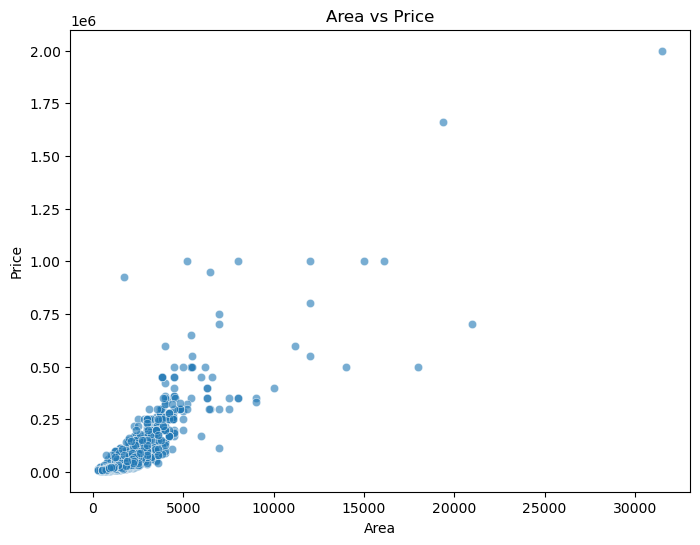

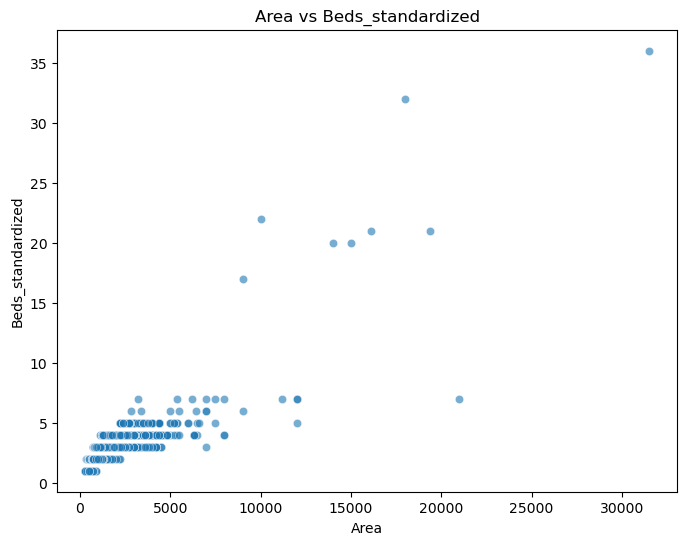

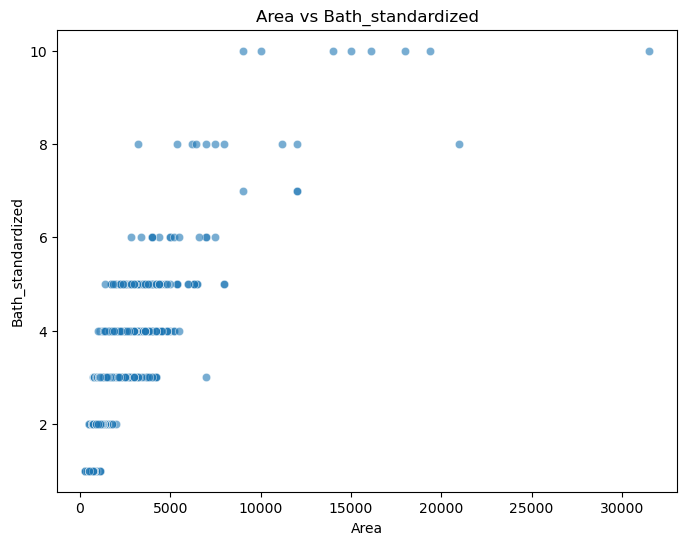

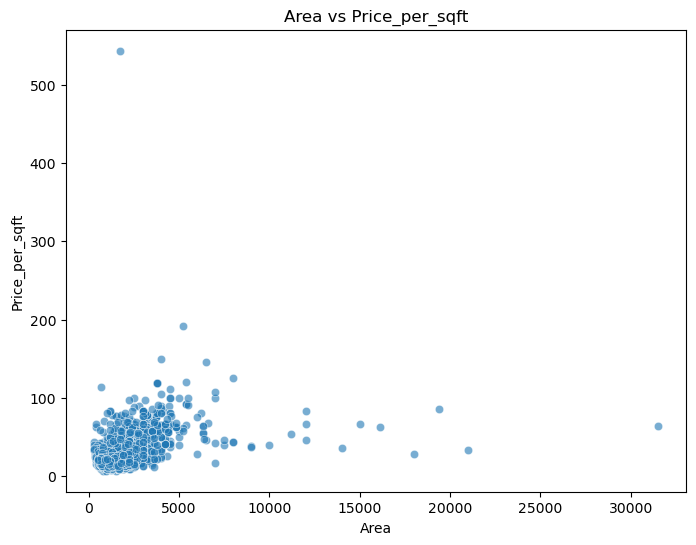

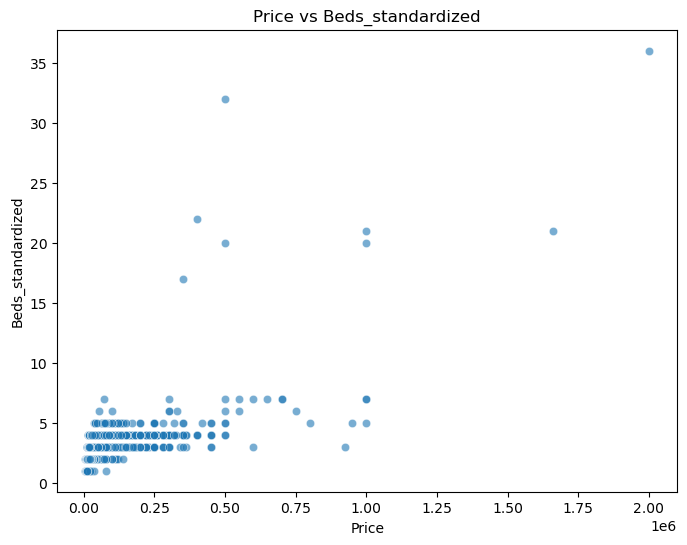

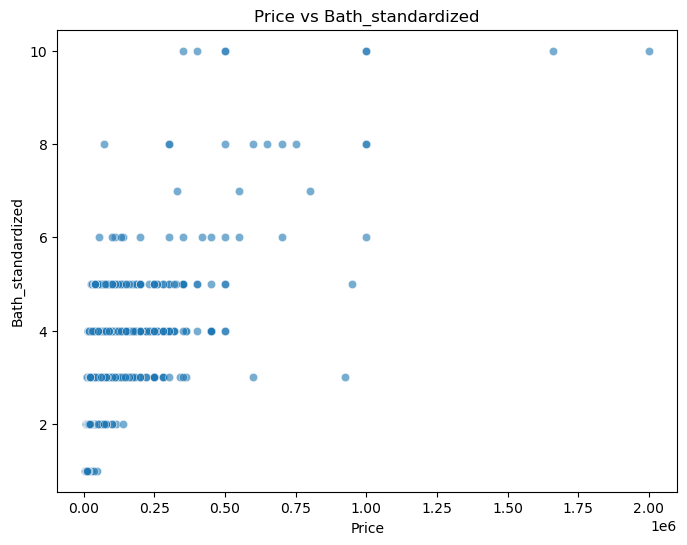

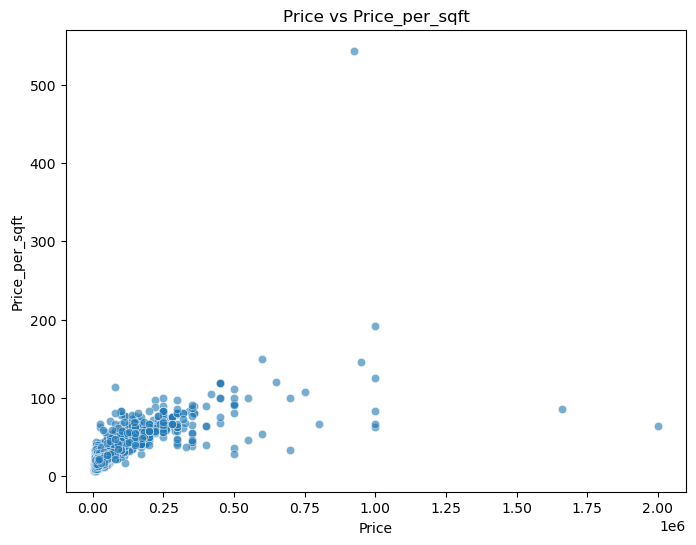

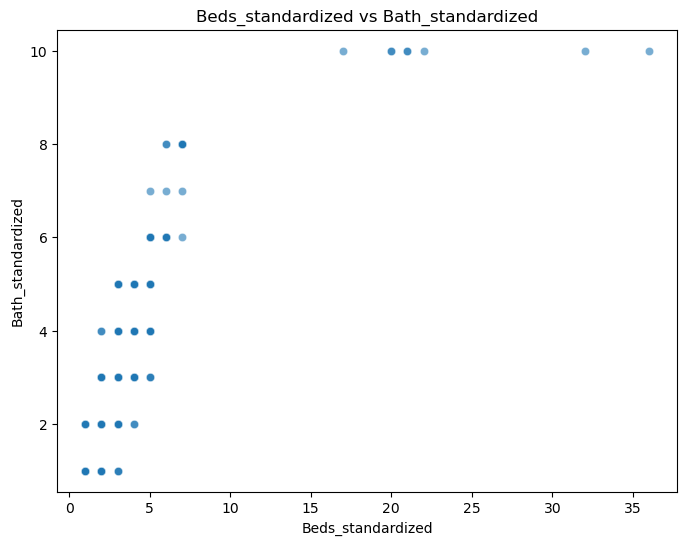

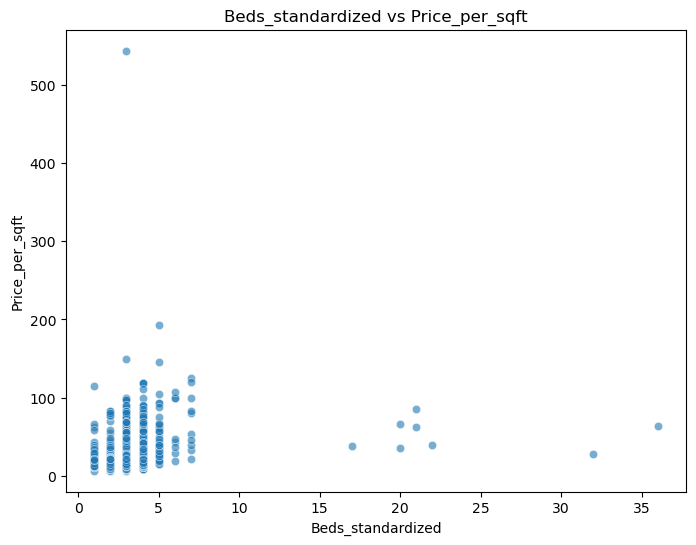

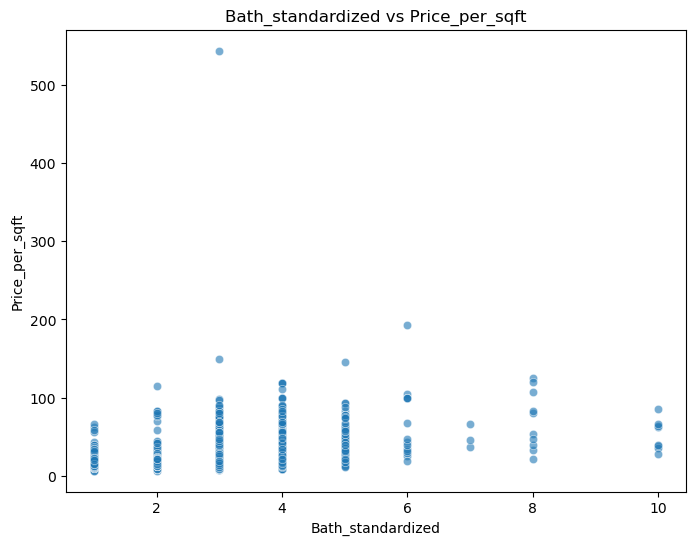

In [45]:
# List of numerical features
numerical_features = ['area', 'price', 'beds_standardized', 'bath_standardized', 'price_per_sqft']
# Generate pairwise combinations of numerical features
feature_pairs = list(combinations(numerical_features, 2))
# Plot each pair in a separate figure
for (feature_x, feature_y) in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df4, x=feature_x, y=feature_y, alpha=0.6)
    plt.title(f"{feature_x.capitalize()} vs {feature_y.capitalize()}")
    plt.xlabel(feature_x.capitalize())
    plt.ylabel(feature_y.capitalize())
    plt.show()

<h2 style="color:blue">Drop features that are not required to build the model</h2>

In [47]:
df5 = df4.drop(['title','type','purpose','flooPlan','url','lastUpdated'],axis='columns')
df5.shape
df5.head()

,area,address,price,beds_standardized,bath_standardized,price_per_sqft
0,2200.0,"Block A, Bashundhara R-A, Dhaka",50000.0,3,4,22.727273
1,1400.0,"South Khulshi, Khulshi, Chattogram",30000.0,3,4,21.428571
2,1950.0,"Block F, Bashundhara R-A, Dhaka",30000.0,3,4,15.384615
3,2000.0,"Sector 9, Uttara, Dhaka",35000.0,3,3,17.500000
4,1650.0,"Block I, Bashundhara R-A, Dhaka",25000.0,3,4,15.151515


<h2 style="color:blue">Modify Address Column using Dimensionality Reduction Technique</h2>

In [49]:
len(df5.address.unique())

676

In [50]:
df5.address = df5.address.apply(lambda x: x.strip())
address_stats = df5['address'].value_counts(ascending=False)
address_stats

address
Sector 13, Uttara, Dhaka                                                                   248
Mirpur, Dhaka                                                                              152
Block K, Baridhara, Dhaka                                                                  150
Sector 10, Uttara, Dhaka                                                                   148
Block A, Rajuk Uttara Apartment Project, Sector 18, Uttara, Dhaka                          143
                                                                                          ... 
Oxygen Residential Area, Oxygen, Bayazid, Chattogram                                         1
Block B, Rupnagar Residential Area, Wazedia, 3 No. Panchlaish Ward, Bayazid, Chattogram      1
Road No 1, CDA Residential Area, Colonel Hat, 10 No. North Kattali Ward, Chattogram          1
Tilpapara Road, Tilpapara, Khilgaon, Dhaka                                                   1
Modhubag, Boro Maghbazar, Maghbazar, Dhaka

<h2 style="color:blue">Dimensionality Reduction</h2>

Any address having less than or equal to 10 data points should be tagged as "other" address. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [53]:
address_stats_less_than_10 = address_stats[address_stats<=10]
address_stats_less_than_10

address
Munshi Para, Munir Nagar, 37 No. North-Middle Halishahar Ward, Halishahar, Chattogram      10
Shahjahanpur, Dhaka                                                                        10
Bot Tola, Khilkhet, Dhaka                                                                  10
28 No. Pathantooly Ward, Double Mooring, Chattogram                                        10
Senpara Parbata, Section 10, Mirpur, Dhaka                                                 10
                                                                                           ..
Oxygen Residential Area, Oxygen, Bayazid, Chattogram                                        1
Block B, Rupnagar Residential Area, Wazedia, 3 No. Panchlaish Ward, Bayazid, Chattogram     1
Road No 1, CDA Residential Area, Colonel Hat, 10 No. North Kattali Ward, Chattogram         1
Tilpapara Road, Tilpapara, Khilgaon, Dhaka                                                  1
Modhubag, Boro Maghbazar, Maghbazar, Dhaka          

In [54]:
df5.address = df5.address.apply(lambda x: 'other' if x in address_stats_less_than_10 else x)
len(df5.address.unique())

183

In [55]:
df5.head(30)

,area,address,price,beds_standardized,bath_standardized,price_per_sqft
0,2200.0,"Block A, Bashundhara R-A, Dhaka",50000.0,3,4,22.727273
1,1400.0,"South Khulshi, Khulshi, Chattogram",30000.0,3,4,21.428571
2,1950.0,"Block F, Bashundhara R-A, Dhaka",30000.0,3,4,15.384615
3,2000.0,"Sector 9, Uttara, Dhaka",35000.0,3,3,17.500000
4,1650.0,"Block I, Bashundhara R-A, Dhaka",25000.0,3,4,15.151515
5,3400.0,"Gulshan 1, Gulshan, Dhaka",110000.0,5,5,32.352941
6,1600.0,"Sector 6, Uttara, Dhaka",35000.0,3,3,21.875000
7,1250.0,"Block K, Bashundhara R-A, Dhaka",23000.0,3,3,18.400000
8,2150.0,"Sector 10, Uttara, Dhaka",40000.0,3,4,18.604651
9,1250.0,"Block K, Bashundhara R-A, Dhaka",23000.0,3,3,18.400000


<h2 style="color:blue">Outlier Removal Using IQR, Standard Deviation and Mean</h2>

<h3 style="color:blue">Remove Outlier Based On Unrealistic Number of Bedrooms and Baths</h3>

In Dhaka, typical properties rarely exceed 8 bedrooms and 6 bathrooms, even for larger homes or apartments. So, rows with more than 8 bedrooms or 6 baths are removed

In [59]:
df5.shape

(7545, 6)

In [60]:
def remove_unrealistic_bed_bath(df, max_bedrooms=8, max_baths=6):
    # Ensure beds_standardized and bath_standardized are numeric
    df['beds_standardized'] = pd.to_numeric(df['beds_standardized'], errors='coerce')
    df['bath_standardized'] = pd.to_numeric(df['bath_standardized'], errors='coerce')

    # Filter rows with valid numeric values and within the specified thresholds
    df = df[(df['beds_standardized'] <= max_bedrooms) & (df['bath_standardized'] <= max_baths)]
    return df

# Apply the function
df6 = remove_unrealistic_bed_bath(df5)
df6.shape


(7524, 6)

<h3 style="color:blue">Remove Outlier Based On Area of A Single Bedroom using IQR</h3>

In [62]:
(df6.area/df6.beds_standardized).describe()

count    7524.000000
mean      478.839821
std       156.965850
min       175.000000
25%       385.000000
50%       433.333333
75%       525.000000
max      2333.333333
dtype: float64

To determine an appropriate range for removing outliers, the <b>Interquartile Range (IQR)</b> method is used

<b>Calculate the IQR:</b>
IQR = Q3 − Q1 = 526.67 − 386.67 = 140

<b>Define the lower and upper bounds:</b><br>
Lower bound = Q1 − 1.5 × IQR = 386.67 − (1.5 × 140) = 176.67<br>
Upper bound = Q3 + 1.5 × IQR = 526.67 + (1.5 × 140) = 736.67

Based on this, values below 176.67 or above 736.67 sqft per bedroom could be considered as outliers and removed.

In [64]:
len(df6[df6.area/df6.beds_standardized<176.67])

1

In [65]:
len(df6[df6.area/df6.beds_standardized>736.67])

517

In [66]:
# Create df7 by filtering out the rows that satisfy either condition
df7 = df6[(df6.area / df6.beds_standardized <= 736.67) & (df6.area / df6.beds_standardized >= 176.67)]
df7.shape

(7006, 6)

<h3 style="color:blue">Remove Outlier Based On Price per Square Feet using Standard Deviation and Mean</h3>

In [68]:
df7.price_per_sqft.describe()

count    7006.000000
mean       18.634191
std         9.744799
min         6.842105
25%        14.285714
50%        16.842105
75%        20.833333
max       543.529412
Name: price_per_sqft, dtype: float64

**The following function removes outliers by filtering price per square foot values within one standard deviation of the mean for each address group, helping to reduce noise from extreme values.**

In [70]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('address'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(5221, 6)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

def plot_scatter_chart(df,location):
    beds2 = df[(df.address==location) & (df.beds_standardized==2)]
    beds3 = df[(df.address==location) & (df.bath_standardized==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds2.area,beds2.price,color='blue',label='2 Bedrooms', s=50)
    plt.scatter(beds3.area,beds3.price,marker='+', color='green',label='3 Bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Dakshin Kattali, 11 No. South Kattali Ward, Chattogram")

plot_scatter_chart(df8,"other")

**As shown in the graphs above, properties in the same location where, for example, a 3-bedroom apartment is priced lower than a 2-bedroom apartment (with the same square footage) should be removed as outliers.**

def remove_beds_price_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('address'):
        beds_stats = {}
        for beds, beds_df in location_df.groupby('beds_standardized'):
            beds_stats[beds] = {
                'mean': np.mean(beds_df.price_per_sqft),
                'std': np.std(beds_df.price_per_sqft),
                'count': beds_df.shape[0]
            }
        for beds, beds_df in location_df.groupby('beds_standardized'):
            stats = beds_stats.get(beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, beds_df[beds_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_beds_price_outliers(df8)
# df8 = df7.copy()
df9.shape

**Plot same scatter chart again to visualize price_per_sqft for 2 Bedrooms and 3 Bedrooms properties**

plot_scatter_chart(df9,"Dakshin Kattali, 11 No. South Kattali Ward, Chattogram")

plot_scatter_chart(df9,"other")

<h2 style="color:blue">Histogram (Count vs Price Per Square Feet)</h2>

Text(0, 0.5, 'Count')

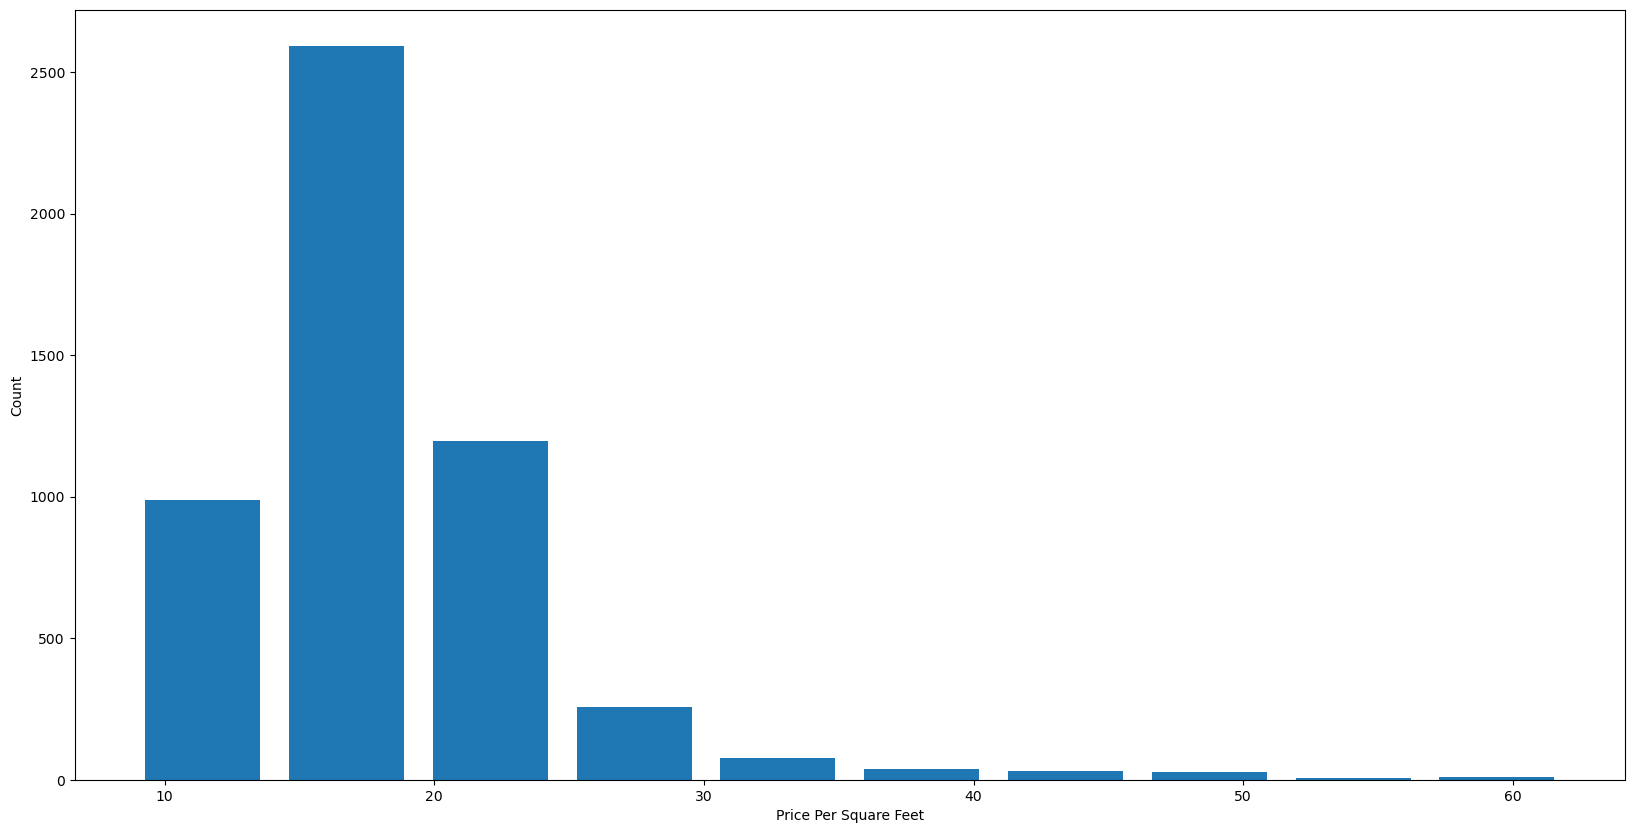

In [83]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Suppose, there is a 3 bedroom home and even there is bathroom in all 3 rooms plus one guest bathroom, total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [85]:
df9 = df8[df8.bath_standardized <= df8.beds_standardized + 1]
df9.head(10)

,area,address,price,beds_standardized,bath_standardized,price_per_sqft
0,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647
1,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647
2,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647
3,1150.0,"10 No. North Kattali Ward, Chattogram",16000.0,3,3,13.913043
4,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647
5,850.0,"10 No. North Kattali Ward, Chattogram",14000.0,2,2,16.470588
6,850.0,"10 No. North Kattali Ward, Chattogram",14000.0,2,2,16.470588
7,850.0,"10 No. North Kattali Ward, Chattogram",14000.0,2,2,16.470588
8,850.0,"10 No. North Kattali Ward, Chattogram",14000.0,2,2,16.470588
9,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647


In [86]:
len(df9.address.unique())

182

<h2 style='color:blue'>Modifying Address Column Specifically for Generating Correlation Matrix</h2>

<h3 style='color:blue'>Temporary Encoding for address for Correlation Matrix</h3>

In [89]:
# Create a copy of df10 to avoid modifying the original data
df_temp = df9.copy()

# Apply target encoding on 'address' (using mean of 'price' per address)
# Assuming 'price' is your target variable
df_temp['address_encoded'] = df_temp.groupby('address')['price'].transform('mean')

# Drop the original 'address' column from df_temp for correlation analysis
df_temp = df_temp.drop(columns='address')

# Step 2: Generate the Correlation Matrix
correlation_matrix = df_temp.corr()
correlation_matrix


,area,price,beds_standardized,bath_standardized,price_per_sqft,address_encoded
area,1.000000,0.789180,0.797984,0.827288,0.334181,0.585142
price,0.789180,1.000000,0.552687,0.592205,0.807483,0.873008
beds_standardized,0.797984,0.552687,1.000000,0.770009,0.154377,0.345429
bath_standardized,0.827288,0.592205,0.770009,1.000000,0.216652,0.407139
price_per_sqft,0.334181,0.807483,0.154377,0.216652,1.000000,0.823275
address_encoded,0.585142,0.873008,0.345429,0.407139,0.823275,1.000000


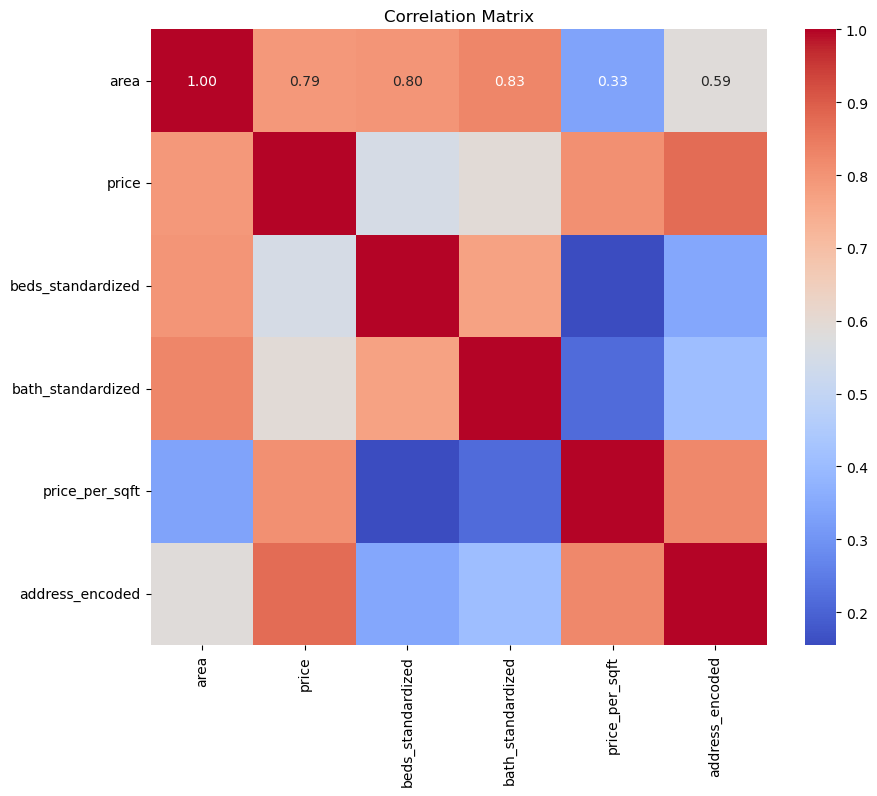

In [90]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


<h2 style='color:blue'>Apply One Hot Encoding For Address Column</h2>

In [103]:
dummies = pd.get_dummies(df9.address, dtype=int)
dummies.head(3)

,"10 No. North Kattali Ward, Chattogram","11 No. South Kattali Ward, Chattogram","15 No. Bagmoniram Ward, Chattogram","24 No. North Agrabad Ward, Double Mooring, Chattogram","25 No. Rampur Ward, Double Mooring, Chattogram","30 No. East Madarbari Ward, Chattogram","33 No. Firingee Bazaar Ward, Chattogram","4 No Chandgaon Ward, Chattogram","7 No. West Sholoshohor Ward, Chattogram","A-Block Chandgaon R/A, Chandgaon Residential Area, 4 No Chandgaon Ward, Chattogram",...,"Uttar Badda, Badda, Dhaka","Uttar Khan, Dhaka","Uttara, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kazipara, Mirpur, Dhaka","West Khulshi R/A, 9 No. North Pahartali Ward, Chattogram","West Shewrapara, Mirpur, Dhaka","Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3 style='color:blue'>Dropping The 'other' Column to Avoid Multicollinearity (Dummy Encoding)</h3>

In [105]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,area,address,price,beds_standardized,bath_standardized,price_per_sqft,"10 No. North Kattali Ward, Chattogram","11 No. South Kattali Ward, Chattogram","15 No. Bagmoniram Ward, Chattogram","24 No. North Agrabad Ward, Double Mooring, Chattogram",...,"Turag, Dhaka","Uttar Badda, Badda, Dhaka","Uttar Khan, Dhaka","Uttara, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kazipara, Mirpur, Dhaka","West Khulshi R/A, 9 No. North Pahartali Ward, Chattogram","West Shewrapara, Mirpur, Dhaka","Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram"
0,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1150.0,"10 No. North Kattali Ward, Chattogram",16000.0,3,3,13.913043,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,850.0,"10 No. North Kattali Ward, Chattogram",12000.0,2,2,14.117647,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3 style='color:blue'>Dropping The Original Feature (address) to Avoid Data Redundancy</h3>

In [107]:
df11 = df10.drop('address',axis='columns')
df11.head(2)

,area,price,beds_standardized,bath_standardized,price_per_sqft,"10 No. North Kattali Ward, Chattogram","11 No. South Kattali Ward, Chattogram","15 No. Bagmoniram Ward, Chattogram","24 No. North Agrabad Ward, Double Mooring, Chattogram","25 No. Rampur Ward, Double Mooring, Chattogram",...,"Turag, Dhaka","Uttar Badda, Badda, Dhaka","Uttar Khan, Dhaka","Uttara, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kazipara, Mirpur, Dhaka","West Khulshi R/A, 9 No. North Pahartali Ward, Chattogram","West Shewrapara, Mirpur, Dhaka","Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram"
0,850.0,12000.0,2,2,14.117647,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,850.0,12000.0,2,2,14.117647,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style='color:blue'>Build a Model</h2>

In [109]:
df11.shape

(5217, 186)

In [110]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,area,beds_standardized,bath_standardized,price_per_sqft,"10 No. North Kattali Ward, Chattogram","11 No. South Kattali Ward, Chattogram","15 No. Bagmoniram Ward, Chattogram","24 No. North Agrabad Ward, Double Mooring, Chattogram","25 No. Rampur Ward, Double Mooring, Chattogram","30 No. East Madarbari Ward, Chattogram",...,"Turag, Dhaka","Uttar Badda, Badda, Dhaka","Uttar Khan, Dhaka","Uttara, Dhaka","West Agargaon, Agargaon, Dhaka","West Dhanmondi and Shangkar, Dhanmondi, Dhaka","West Kazipara, Mirpur, Dhaka","West Khulshi R/A, 9 No. North Pahartali Ward, Chattogram","West Shewrapara, Mirpur, Dhaka","Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram"
0,850.0,2,2,14.117647,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,850.0,2,2,14.117647,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,850.0,2,2,14.117647,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X.shape

(5217, 185)

In [112]:
y = df11.price
y.head(3)

0    12000.0
1    12000.0
2    12000.0
Name: price, dtype: float64

In [113]:
len(y)

5217

<h2 style='color:blue'>Split Dataset: 80% Train, 20% Test</h2>

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

<h2 style='color:blue'>Applying 5 different ML models, Using K-Fold Cross-Validation to evaluate</h2>

In [117]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Function to evaluate and print performance
def evaluate_model(model):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Testing Metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # k-Fold Cross-Validation Metrics
    k = 10  # Number of folds
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    mape_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_percentage_error')

    # Convert to positive and calculate mean and standard deviation
    mape_mean = -mape_scores.mean() * 100
    mape_std = mape_scores.std() * 100
    
    # Display the results
    print(f"{model.__class__.__name__}:\n")
    print(f"Training Set - MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}, R^2 Score: {train_r2:.2f}")
    print(f"Testing Set  - MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}, R^2 Score: {test_r2:.2f}")
    print(f"k-Fold CV   - Mean RMSE: {cv_rmse_scores.mean():.2f}, Std RMSE: {cv_rmse_scores.std():.2f}")
    print(f"{model.__class__.__name__} - Mean MAPE: {mape_mean:.2f}%, Std MAPE: {mape_std:.2f}%\n")

# 1. Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model)

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model)

# 3. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
evaluate_model(rf_model)

# 4. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
evaluate_model(gb_model)

# 5. Support Vector Regressor (SVR)
svr_model = SVR(kernel='linear')  # Choose 'linear' or 'rbf' kernel based on performance
evaluate_model(svr_model)


LinearRegression:

Training Set - MSE: 5548449.33, RMSE: 2355.51, MAE: 1327.02, R^2 Score: 0.98
Testing Set  - MSE: 6872208.27, RMSE: 2621.49, MAE: 1372.36, R^2 Score: 0.97
k-Fold CV   - Mean RMSE: 2475.82, Std RMSE: 471.49
LinearRegression - Mean MAPE: 6.71%, Std MAPE: 0.45%

DecisionTreeRegressor:

Training Set - MSE: 0.00, RMSE: 0.00, MAE: 0.00, R^2 Score: 1.00
Testing Set  - MSE: 1355804.69, RMSE: 1164.39, MAE: 224.53, R^2 Score: 0.99
k-Fold CV   - Mean RMSE: 1368.03, Std RMSE: 650.23
DecisionTreeRegressor - Mean MAPE: 0.57%, Std MAPE: 0.10%

RandomForestRegressor:

Training Set - MSE: 281670.78, RMSE: 530.73, MAE: 76.83, R^2 Score: 1.00
Testing Set  - MSE: 1235187.42, RMSE: 1111.39, MAE: 198.23, R^2 Score: 0.99
k-Fold CV   - Mean RMSE: 957.54, Std RMSE: 601.95
RandomForestRegressor - Mean MAPE: 0.44%, Std MAPE: 0.08%

GradientBoostingRegressor:

Training Set - MSE: 427444.16, RMSE: 653.79, MAE: 430.52, R^2 Score: 1.00
Testing Set  - MSE: 784944.53, RMSE: 885.97, MAE: 492.49, R^2 S

<h2 style='color:blue'>Finding the best model using GridSearchCV</h2>

In [119]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define parameter grids for each model
param_grids = {
    "Linear Regression": {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    "Decision Tree Regressor": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest Regressor": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting Regressor": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    "Support Vector Regressor": {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    }
}

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# List to store results
results = []

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_absolute_percentage_error')
    grid_search.fit(X, y)
    
    # Convert the negative score to positive and multiply by 100 to get percentage
    best_score = -grid_search.best_score_ * 100
    best_params = grid_search.best_params_
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Best Mean MAPE (%)': best_score,
        'Best Parameters': best_params
    })
    
    print(f"Best Mean MAPE for {model_name}: {best_score:.2f}%")
    print(f"Best Parameters for {model_name}: {best_params}\n")

# Create a DataFrame from the results and sort by best score
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Best Mean MAPE (%)').reset_index(drop=True)

# Display the sorted results with all parameters visible
pd.set_option('display.max_colwidth', None)  # This ensures that all parameter values are fully displayed
print(results_df)


Running GridSearchCV for Linear Regression...
Best Mean MAPE for Linear Regression: 10.64%
Best Parameters for Linear Regression: {'fit_intercept': True, 'positive': False}

Running GridSearchCV for Decision Tree Regressor...
Best Mean MAPE for Decision Tree Regressor: 1.60%
Best Parameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_split': 2}

Running GridSearchCV for Random Forest Regressor...
Best Mean MAPE for Random Forest Regressor: 1.24%
Best Parameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Running GridSearchCV for Gradient Boosting Regressor...
Best Mean MAPE for Gradient Boosting Regressor: 1.25%
Best Parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Running GridSearchCV for Support Vector Regressor...
Best Mean MAPE for Support Vector Regressor: 6.98%
Best Parameters for Support Vector Regressor: {'C': 0.1, 'kernel': 'linear'}

                     

**The best model is Gradient Boosting Regressor with a Mean MAPE of 1.39%, using parameters {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}.**

**Stratified sampling and balancing techniques like SMOTE, oversampling, undersampling, and Tomek links are typically used for classification problems with imbalanced classes and not applicable for this particular regression problem.** 

<h2 style='color:blue'>Gradient Boosting Regressor Evaluation with 50 Epochs</h2>

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Initialize variables
accuracies = []

# Train and evaluate the model for 50 epochs
for epoch in range(50):
    # Split data for this epoch
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=epoch)
    
    # Initialize and train the model
    gb_model = GradientBoostingRegressor(random_state=13, n_estimators=100)
    gb_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = gb_model.predict(X_test)
    
    # Calculate accuracy (1 - MAPE)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    accuracy = (1 - mape) * 100  # Convert to percentage
    accuracies.append(accuracy)

# Calculate the mean accuracy over 50 epochs
final_accuracy = np.mean(accuracies)

# Print the final accuracy
print(f"Final accuracy of the Gradient Boosting Regressor over 50 epochs is: {final_accuracy:.0f}%")



Final accuracy of the Gradient Boosting Regressor over 50 epochs is: 98%


<h2 style='color:blue'>Plot of Gradient Boosting Regressor Accuracy Across 50 Epochs</h2>

The average accuracy of the Gradient Boosting Regressor over 50 epochs is: 98%


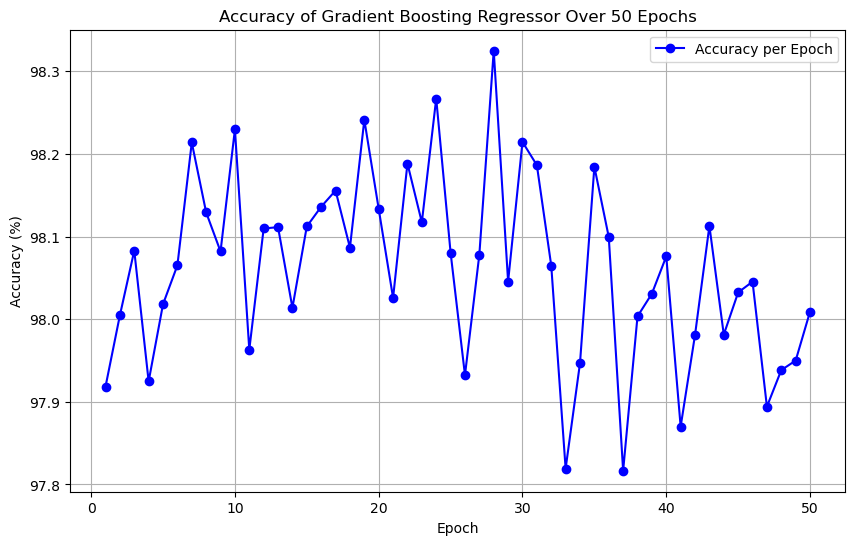

In [125]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize variables
accuracies = []

# Train and evaluate the model for 50 epochs
for epoch in range(50):
    # Split data for this epoch
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=epoch)
    
    # Initialize and train the model
    gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
    gb_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = gb_model.predict(X_test)
    
    # Calculate accuracy (1 - MAPE)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    accuracy = (1 - mape) * 100  # Convert to percentage
    accuracies.append(accuracy)

# Calculate the mean accuracy over 50 epochs
final_accuracy = np.mean(accuracies)

# Print the final accuracy
print(f"The average accuracy of the Gradient Boosting Regressor over 50 epochs is: {final_accuracy:.0f}%")

# Plot the accuracy for each epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), accuracies, marker='o', color='b', label='Accuracy per Epoch')
plt.title('Accuracy of Gradient Boosting Regressor Over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.show()


<h2 style='color:blue'>Test the model for few properties</h2>

In [127]:
X.columns

Index(['area', 'beds_standardized', 'bath_standardized', 'price_per_sqft',
       '10 No. North Kattali Ward, Chattogram',
       '11 No. South Kattali Ward, Chattogram',
       '15 No. Bagmoniram Ward, Chattogram',
       '24 No. North Agrabad Ward, Double Mooring, Chattogram',
       '25 No. Rampur Ward, Double Mooring, Chattogram',
       '30 No. East Madarbari Ward, Chattogram',
       ...
       'Turag, Dhaka', 'Uttar Badda, Badda, Dhaka', 'Uttar Khan, Dhaka',
       'Uttara, Dhaka', 'West Agargaon, Agargaon, Dhaka',
       'West Dhanmondi and Shangkar, Dhanmondi, Dhaka',
       'West Kazipara, Mirpur, Dhaka',
       'West Khulshi R/A, 9 No. North Pahartali Ward, Chattogram',
       'West Shewrapara, Mirpur, Dhaka',
       'Zakir Hossain Housing Society, South Khulshi, Khulshi, Chattogram'],
      dtype='object', length=185)

In [128]:
def predict_price(address, area, beds_standardized, bath_standardized):    
    address_index = np.where(X.columns==address)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = beds_standardized
    x[2] = bath_standardized
    if address_index >= 0:
        x[address_index] = 1

    return gb_model.predict([x])[0]

In [129]:
predict_price('Block A, Bashundhara R-A, Dhaka',2200, 3, 4)

26034.322130718443

In [130]:
predict_price('Block F, Bashundhara R-A, Dhaka',1950, 3, 5)

22479.224452191196

In [131]:
predict_price('Block I, Bashundhara R-A, Dhaka',1650, 3, 4)

15177.891266393397

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [158]:
import pickle
with open('house_prices_model.pickle','wb') as f:
    pickle.dump(gb_model,f)

<h2 style='color:blue'>Export address and column information to a json file</h2>

In [160]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))